# Searching for Stations
## Where in the world are these stations?

One common frustration is finding relevant stations for analysis and validation

**What are some methods you have used to identify stations that fit your research?**

In [1]:
# Imports
from datetime import datetime
import pandas as pd
import geopandas as gpd
from pathlib import Path

from metloom.pointdata import SnotelPointData, CDECPointData, MesowestPointData

In [2]:
try:
    import folium
except Exception as e:
    !pip install folium
    
try:
    import mapclassify
except Exception as e:
    !pip install mapclassify

## Search for points in an area

In [3]:
# Find your area
sf_path = Path("./data/outline.shp").expanduser()
sf = gpd.read_file(str(sf_path))
sf["name"] = ["Our outline"]
variables = [SnotelPointData.ALLOWED_VARIABLES.SNOWDEPTH]


In [4]:
# What does the area look like
sf.explore()

In [5]:
# Find all the points in the area for our variables
points = SnotelPointData.points_from_geometry(sf, variables)
print(len(points))
# This is an iterator
print(type(points))
# It contains the points in a `points` attribute
print(points.points)

2
<class 'metloom.pointdata.base.PointDataCollection'>
[SnotelPointData('637:ID:SNTL', 'Mores Creek Summit'), SnotelPointData('978:ID:SNTL', 'Bogus Basin')]


### What if I want a station nearby?

In [6]:
# buffer - add buffer (in degrees) to extents
print(SnotelPointData.points_from_geometry(sf, variables, buffer=0.5).points)

# within_geometry - doesn't do anything since our geometry is already a square
print(SnotelPointData.points_from_geometry(sf, variables, within_geometry=False).points)

[SnotelPointData('637:ID:SNTL', 'Mores Creek Summit'), SnotelPointData('978:ID:SNTL', 'Bogus Basin')]
[SnotelPointData('637:ID:SNTL', 'Mores Creek Summit'), SnotelPointData('978:ID:SNTL', 'Bogus Basin')]


In [34]:
# imports for a static map
try:
    import contextily as ctx
except Exception:
    !pip install contextily
    import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point

                 name           id datasource                     geometry
0  Mores Creek Summit  637:ID:SNTL       NRCS  POINT (-115.66588 43.93200)
1         Bogus Basin  978:ID:SNTL       NRCS  POINT (-116.09685 43.76377)


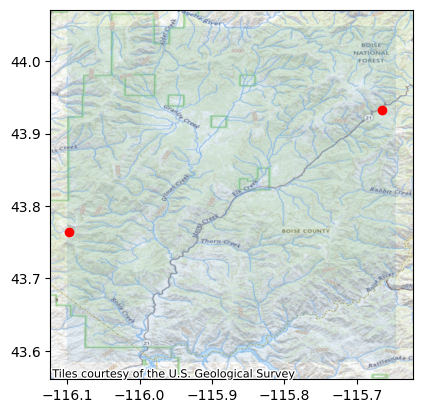

In [66]:
# Make a static plot of the points

# turn that iterator into a dataframe
df = points.to_dataframe()
# look at what is in the dataframe
df.head(10)

def remove_z(geom):
    if geom.is_empty:
        return geom
    else:
        return Point(geom.x, geom.y)

df.geometry = df.geometry.apply(remove_z)
df = df.set_crs("EPSG:4326")


print(df)
ax = sf.to_crs("EPSG:4326").plot(alpha=0.1)
ax = df.plot(ax=ax, color="red")
ctx.add_basemap(
    ax,
    # source=ctx.providers.OpenStreetMap.Mapnik,
    source=ctx.providers.USGS.USTopo,
    crs=df.crs,
    # zoom=5
)


## Our plot could be more interesting


In [7]:


# plot the shapefile
m = sf.explore(
    tooltip=False, color="grey", highlight=False, style_kwds={"opacity": 0.2}, popup=["name"]
)
# plot the points on top of the shapefile
df.explore(m=m, tooltip=["name", "id"], color="red", marker_kwds={"radius":4})

## Extra
**How would we get the daily data for the first point from points?**